In [8]:
%load_ext autoreload
%autoreload 2

In [37]:
import torch
import torchvision
import numpy as np
import torchvision.transforms as transforms
from dataset.get_dataloader import get_dataloader,loader2vec, vec_dis
from dataset.data2betti import distance_betti, distance_betti_ripser, plt_betti_number,plot_betti_number_bars
from dataset.get_betti_number import betti_number
from ripser import Rips, ripser

# 释放不需要的内存
torch.cuda.empty_cache()


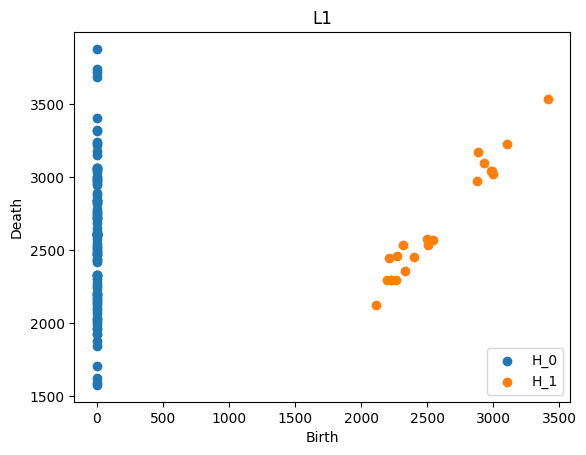

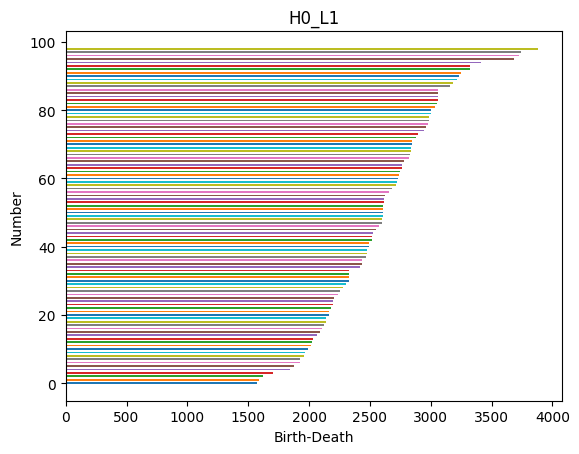

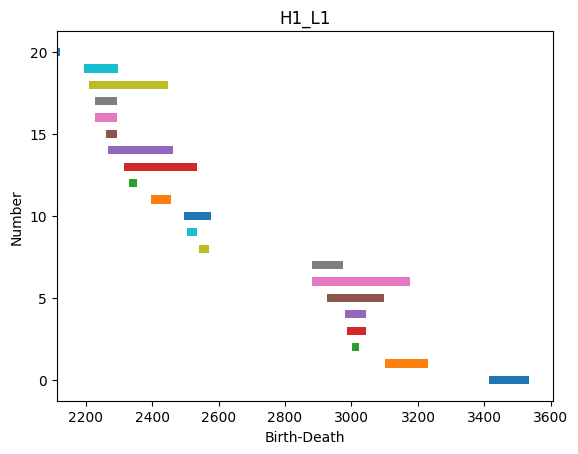

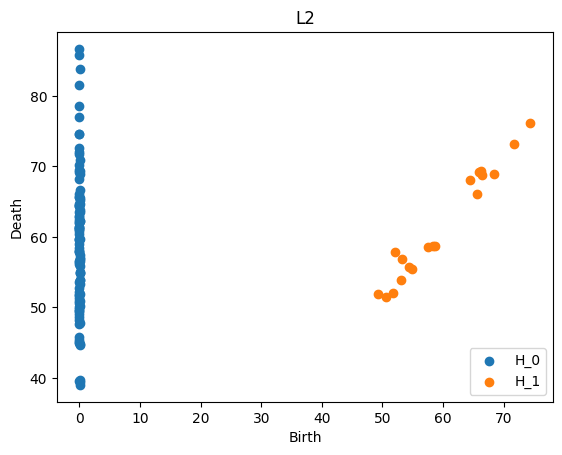

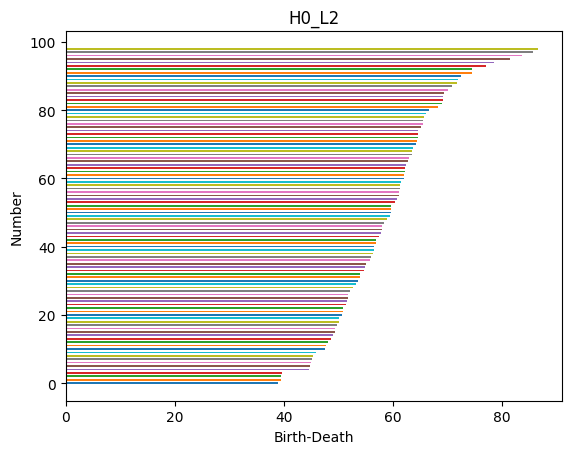

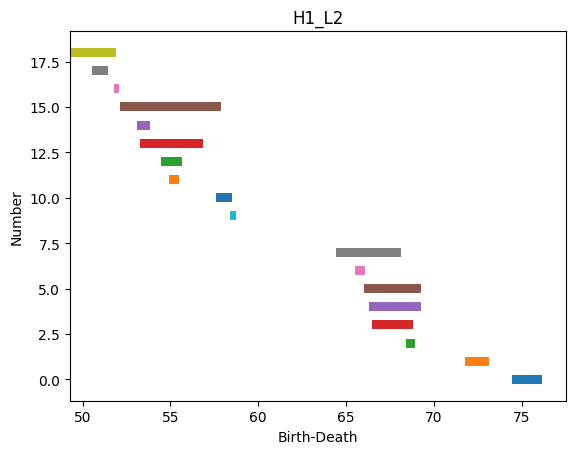

In [44]:
chose = "cifar10_debug"
train_loader, test_loader = get_dataloader(chose=chose,debug_size=100)
flattened_images = loader2vec(train_loader=train_loader)

# flattened_images现在包含整个训练集中的图像向量，形状为(N, 3 * 224 * 224)，其中N是训练集的大小
save_floor = "./distance/100/"
l2_distances = vec_dis(data_matrix=flattened_images, distance="l2",save_flag=True,root=save_floor)
l1_distances = vec_dis(data_matrix=flattened_images, distance="l1",save_flag=True,root=save_floor)
# print(l2_distances)


# 读取 L2 范数距离矩阵
l2_floor = f"{save_floor}l2_distance.npy"
loaded_l2_distances = np.load(l2_floor)

# 读取 L1 范数距离矩阵
l1_floor = f"{save_floor}l1_distance.npy"
loaded_l1_distances = np.load(l1_floor)

d1= ripser(l1_distances, maxdim=1, distance_matrix=True)
plt_betti_number(d1["dgms"],plt_title="L1",root=save_floor)
# print(len(d["dgms"][0]))

plot_betti_number_bars(d1["dgms"],plt_title="L1",root=save_floor)

d2= ripser(l2_distances, maxdim=1, distance_matrix=True)
plt_betti_number(d2["dgms"],plt_title="L2", root=save_floor)
# print(len(d["dgms"][0]))

plot_betti_number_bars(d2["dgms"],plt_title="L2",root=save_floor)